In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import seaborn as sns
sns.set()

In [15]:
data=pd.read_csv('Fremont_Bridge_Bicycle_Counter.csv',index_col="Date",parse_dates=True)

In [16]:
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


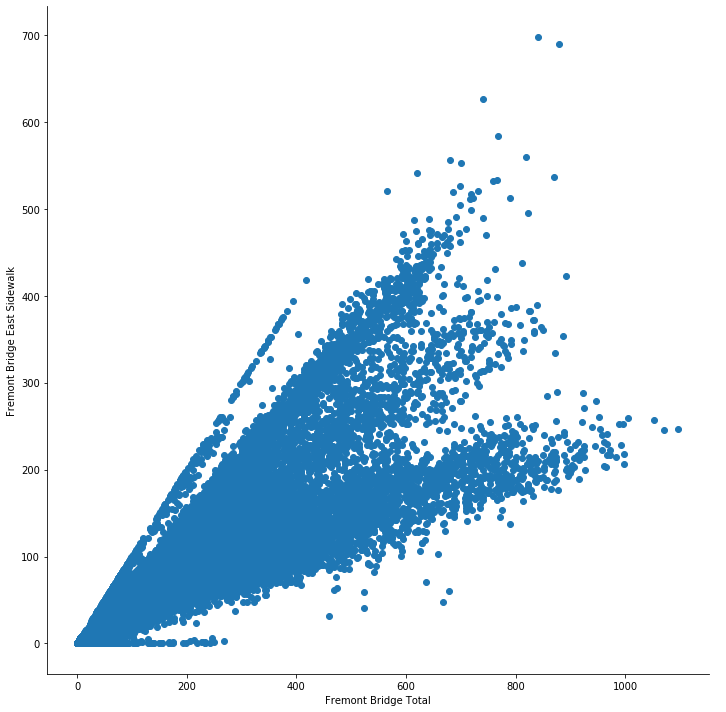

In [21]:
sns.FacetGrid(data,size=10)\
    .map(pl.scatter,"Fremont Bridge Total","Fremont Bridge East Sidewalk")\
    .add_legend()

In [26]:
data=data.drop("Fremont Bridge Total",axis=1)


In [31]:
data.columns=['West','East']
data.head()

,West,East
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


In [46]:
data['Total']=data.eval('West+East')
# adding two rows east and west by easy way data.eval()
data.head()

,West,East,Total
Date,,,
2012-10-03 00:00:00,4.0,9.0,13.0
2012-10-03 01:00:00,4.0,6.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,2.0,3.0,5.0
2012-10-03 04:00:00,6.0,1.0,7.0


In [45]:
data.dropna().describe()

,West,East,Total
count,64238.000000,64238.000000,64238.000000
mean,52.153959,61.756172,113.910131
std,67.179748,90.507860,145.289364
min,0.000000,0.000000,0.000000
25%,6.000000,7.000000,15.000000
50%,29.000000,30.000000,61.000000
75%,70.000000,74.000000,148.000000
max,698.000000,850.000000,1097.000000


Text(0, 0.5, 'Hourly Bicycle count')

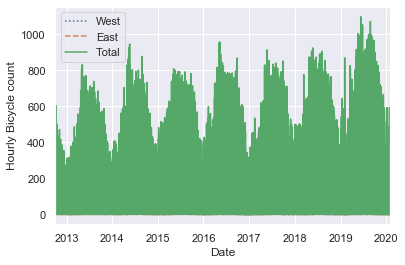

In [82]:
data.plot(style=[':','--','-'])
pl.ylabel("Hourly Bicycle count")

In [54]:
weekly=data.resample('W').sum()

In [65]:
weekly.head()

,West,East,Total
Date,,,
2012-10-07,7297.0,6995.0,14292.0
2012-10-14,8679.0,8116.0,16795.0
2012-10-21,7946.0,7563.0,15509.0
2012-10-28,6901.0,6536.0,13437.0
2012-11-04,6408.0,5786.0,12194.0


Text(0, 0.5, 'Weekly bicycle count')

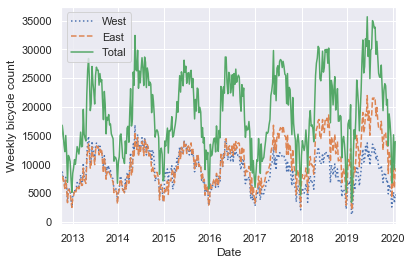

In [67]:
weekly.plot(style=[':','--','-'])
pl.ylabel("Weekly bicycle count")

Text(0, 0.5, 'Mean hourly count')

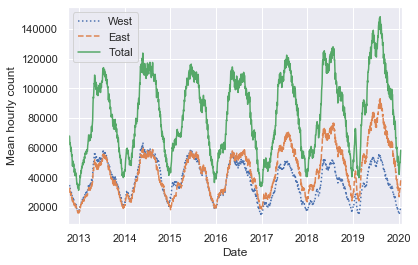

In [157]:
daily=data.resample('D').sum()
daily.rolling(30,center=True).sum().plot(style=[':','--','-'])
pl.ylabel("Mean hourly count")

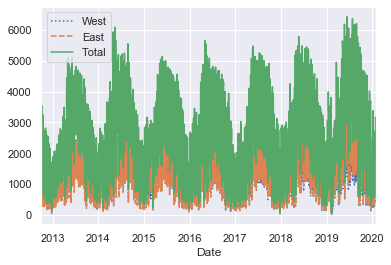

In [89]:
daily.plot(style=[':','--','-'])
# this is difference between above rolling and normal plot

Text(0, 0.5, 'Yearly mean count')

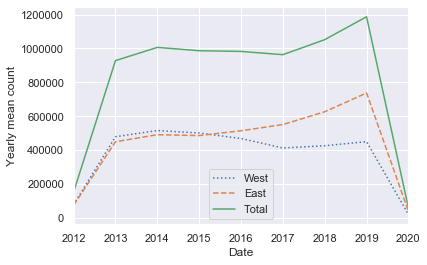

In [87]:
yearly=data.resample('Y').sum()
yearly.plot(style=[':','--','-'])
pl.ylabel("Yearly mean count")

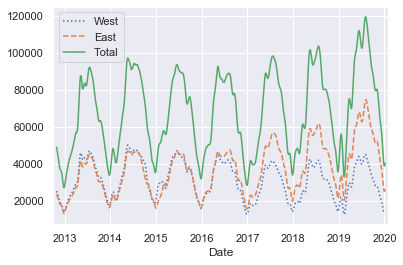

In [158]:
daily.rolling(50,center=True,win_type='gaussian').sum(std=10).plot(style=[':','--','-'])

In [126]:
daily=daily.reset_index()

In [154]:
day=pd.DataFrame(daily.iloc[:1185,:])
day.head()
day=day.set_index("Date")

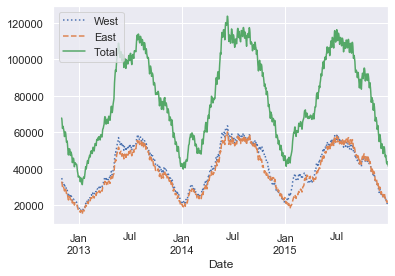

In [155]:
day.rolling(30,).sum().plot(style=[':','--','-'])

In [165]:
by_time=data.groupby(data.index.time).mean()
hourl_ticks=4*60*60*np.arange(6)
hourl_ticks

array([    0, 14400, 28800, 43200, 57600, 72000])